In [0]:
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [0]:
page_link = 'https://www.libs.ru/best-100-russian/'

proxies = {'http' : 'http://10.10.0.0:0000',  
          'https': 'http://120.10.0.0:0000'}

page_response = requests.get(page_link, proxies, timeout=5)

page_content = BeautifulSoup(page_response.content, "html.parser")


In [0]:
author_name = page_content.find_all('h4', attrs={ "class" : "ant-list-item-meta-title"})
author_name_arr = np.array([])
book_title_arr = np.array([])

for i in author_name:
  split = i.getText().split('\n')
  #print(split)
  split[2] = split[2].replace('        ', '')  
  split[4] = split[4].replace('        автора ', '')
  author_name_arr = np.append(author_name_arr, split[4])
  book_title_arr = np.append(book_title_arr, split[2])

In [0]:
print(author_name_arr)

['Пелевин Виктор' 'Тургенев Иван' 'Тургенев Иван' 'Шаров Владимир'
 'Шаров Владимир' 'Шаров Владимир' 'Моторов Алексей' 'Каминский Леонид'
 'Успенский Эдуард' 'Крусанов Павел' 'Сухов Евгений' 'Георгий Данелия'
 'Пелевин Виктор'
 'Голов РоманПередеряев ИгорьКонстантин ШабалдинРукосуев Андрей'
 'Тургенев Иван' 'Сухов Евгений' 'Фрай Макс' 'Пелевин Виктор'
 'Михаил Андрианов' 'Акунин Борис' 'Петрушевская Людмила' 'Зыгарь Михаил'
 'Иванов Алексей' 'Устинова Татьяна' 'Чулпан ХаматоваГордеева Катерина'
 'Толстой Лев' 'Толстой Лев' 'Маринина Александра' 'Акунин Борис'
 'Акунин Борис' 'Петров Саша' 'Сокол Лена' 'Быков Дмитрий'
 'Иванов Алексей' 'Пелевин Виктор' 'Фрай Макс' 'Млодик Ирина' 'Фрейм Соня'
 'Пелевин Виктор' 'Анна Быкова' 'Булгаков Михаил' 'Петрушевская Людмила'
 'Иванов Алексей' 'Фрай Макс' 'Пелевин Виктор' 'Тургенев Иван'
 'Фигль-Мигль' 'Булычев Кир' 'Булычев Кир' 'Булычев Кир' 'Булычев Кир'
 'Булычев Кир' 'Булычев Кир' 'Булычев Кир' 'Моторов Алексей'
 'Иванов Алексей' 'Акунин Борис

In [0]:
print(book_title_arr)

['Чапаев и Пустота' 'Дворянское гнездо' 'Отцы и дети' 'Воскрешение Лазаря'
 'До и во время. Избранная проза в 3 книгах. Книга 3' 'Репетиции'
 'Преступление доктора Паровозова' 'Урок смеха' 'Следствие ведут колобки'
 'Американская дырка' 'Таежная месть' 'Безбилетный пассажир'
 'Generation «П»' 'Инвестиционное проектирование'
 'Муму. Записки охотника (сборник)' 'Резидент'
 'Неизвестным для меня способом' 'Generation «P» (Поколение «Пи»)'
 'Философия для детей в сказках и рассказах. Пособие по воспитанию детей в семье и школе'
 'Седмица Трехглазого' 'Странствия по поводу смерти'
 'Империя должна умереть. История русских революций в лицах. 1900-1917'
 'Тобол. Мало избранных' 'Сто лет пути' 'Время колоть лед'
 'Крейцерова соната' 'Кавказский пленник' 'Казнь без злого умысла'
 'Счастливая Россия'
 'Не прощаюсь. Приключения Эраста Фандорина в ХХ веке. Часть вторая'
 '#Зановородиться. Невероятная история любви' 'Супергерой для Золушки'
 '100 лекций о русской литературе ХХ века' 'Тобол. Много з

In [0]:
publication_date = page_content.find_all('div', attrs={ "class" : "libs__book_params"})
publication_date_arr = np.array([])

for i in publication_date:
  split = i.getText().split('\n')
  split[0] = split[0].replace('Год издания: ', '')  
  #print(split)
  if (split[0] == ' ') :
      split[0] = np.mean(publication_date_arr)
  publication_date_arr = np.append(publication_date_arr, int(split[0]))

In [0]:
print(publication_date_arr)

[1996. 1859. 1862. 2002. 2009. 2009. 2014. 1986. 2015. 2005. 2016. 1979.
 2007. 2014. 1852. 2018. 2019. 1980. 2017. 2017. 2017. 2017. 2018. 2014.
 2019. 1890. 1872. 2015. 2017. 2018. 2018. 2019. 2019. 2017. 2015. 2017.
 2018. 2018. 2006. 2018. 1940. 2019. 2013. 2012. 1999. 1858. 2013. 2000.
 1996. 1982. 1979. 1991. 1993. 1994. 2012. 2015. 2019. 2017. 1983. 1992.
 1992. 1979. 1974. 1973. 1992. 2005. 1998. 1993. 1994. 1994. 1976. 1986.
 1987. 1986. 1996. 1997. 1993. 1999. 1999. 2001. 1997. 1998. 1977. 1977.
 1994. 1993. 1994. 2006. 1983. 1972. 1998. 1991. 2005. 1967. 1995. 1993.
 2008. 2000. 2003. 2002.]


In [0]:
views = page_content.find_all('ul', attrs={ "class" : "ant-list-item-action"})
rating_arr = np.array([])
views_arr = np.array([])

for i in views:
  split = i.getText().split('\n')
  #print(split)
  split[0] = split[0].replace(' ', '')  
  split[1] = split[1].replace('         ', '')
  views_arr = np.append(views_arr, int(split[1]))
  rating_arr = np.append(rating_arr, float(split[0]))

In [0]:
print(rating_arr)

[5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.
 5.   5.   5.   4.9  4.83 4.8  4.8  4.8  4.76 4.74 4.71 4.7  4.7  4.7
 4.7  4.7  4.7  4.7  4.7  4.68 4.67 4.6  4.6  4.6  4.59 4.58 4.55 4.55
 4.51 4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5
 4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5
 4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5
 4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5
 4.5  4.5 ]


In [0]:
print(views_arr)

[11886.  4306.  3111.  2716.  1666.  1607.  3963.  6507.  2573.  1054.
  1160.   646.  1736.   467.  3791.  1322.  2005.  1081.  1023. 15136.
  4831.  4232.  5002.  2714.  4112.  2194.  2598.  5553.  2363.  5985.
  2162.  3788.  1642.  6359.  4255.  1218.   716.   840.   462.   548.
 10837.   644.   238.  8865.  5741.  8764.  3494.  3826.  2123.  1993.
  1788.  1943.  2028.  2171.  1912. 15890.  3302.  7076.   485.   967.
   643.   591.   400.   499.   473.   671.   614.   420.   390.   457.
   353.   666.   543.   643.   562.   595.   547.   614.   663.   644.
   496.   420.   469.   335.   542.   563.   525.   556.   465.   586.
   432.   475.   500.   518.   473.   523.   498.   603.   502.   573.]


In [0]:
data = { 'author' : author_name_arr, 'book' : book_title_arr, 'year' : publication_date_arr, 'views' : views_arr, 'rating' : rating_arr}
my_dataset = pd.DataFrame(data, columns = ['author', 'book', 'year', 'views', 'rating'])
#my_dataset

In [0]:
my_dataset.head()

,author,book,year,views,rating
0,Пелевин Виктор,Чапаев и Пустота,1996.0,11880.0,5.0
1,Тургенев Иван,Дворянское гнездо,1859.0,4305.0,5.0
2,Тургенев Иван,Отцы и дети,1862.0,3111.0,5.0
3,Шаров Владимир,Воскрешение Лазаря,2002.0,2716.0,5.0
4,Шаров Владимир,До и во время. Избранная проза в 3 книгах. Кни...,2009.0,1664.0,5.0


In [0]:
my_dataset.describe()

,year,views,rating
count,100.000000,100.000000,100.000000
mean,1992.320000,2342.070000,4.633700
std,35.663092,3013.460745,0.190733
min,1852.000000,238.000000,4.500000
25%,1990.000000,537.000000,4.500000
50%,1999.000000,992.500000,4.500000
75%,2015.000000,2814.750000,4.702500
max,2019.000000,15881.000000,5.000000


In [0]:
my_dataset.isnull().sum()

author    0
book      0
year      0
views     0
rating    0
dtype: int64

In [0]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
author    100 non-null object
book      100 non-null object
year      100 non-null float64
views     100 non-null float64
rating    100 non-null float64
dtypes: float64(3), object(2)
memory usage: 4.0+ KB


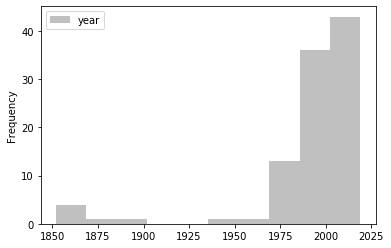

In [0]:
my_dataset.plot(y = 'year', kind='hist', color='silver')

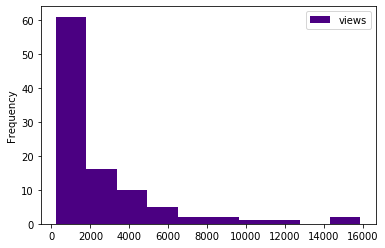

In [0]:
my_dataset.plot(y = 'views', kind='hist', color='indigo')

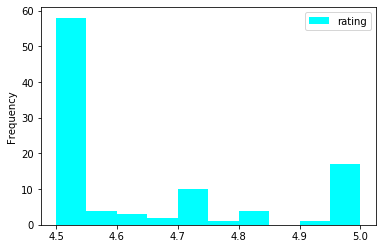

In [0]:
my_dataset.plot(y = 'rating', kind='hist', color='cyan')

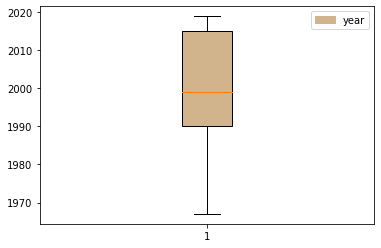

In [0]:
fig1, ax = plt.subplots()
ax.boxplot(my_dataset['year'], patch_artist=True, boxprops=dict(facecolor="tan"), showfliers=False)
boxlabel = mpatches.Patch(color = 'tan', label = 'year')
plt.legend(handles=[boxlabel])

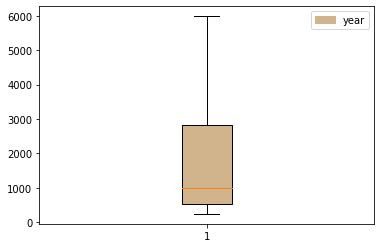

In [0]:
fig1, bx = plt.subplots()
bx.boxplot(my_dataset['views'], patch_artist=True, boxprops=dict(facecolor="tan"), showfliers=False)
boxlabel = mpatches.Patch(color = 'tan', label = 'year')
plt.legend(handles=[boxlabel])

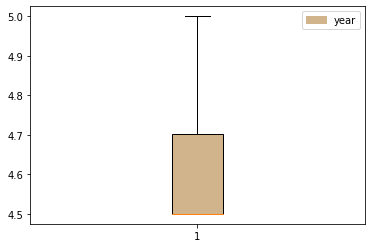

In [0]:
fig1, cx = plt.subplots()
cx.boxplot(my_dataset['rating'], patch_artist=True, boxprops=dict(facecolor="tan"), showfliers=False)
boxlabel = mpatches.Patch(color = 'tan', label = 'year')
plt.legend(handles=[boxlabel])

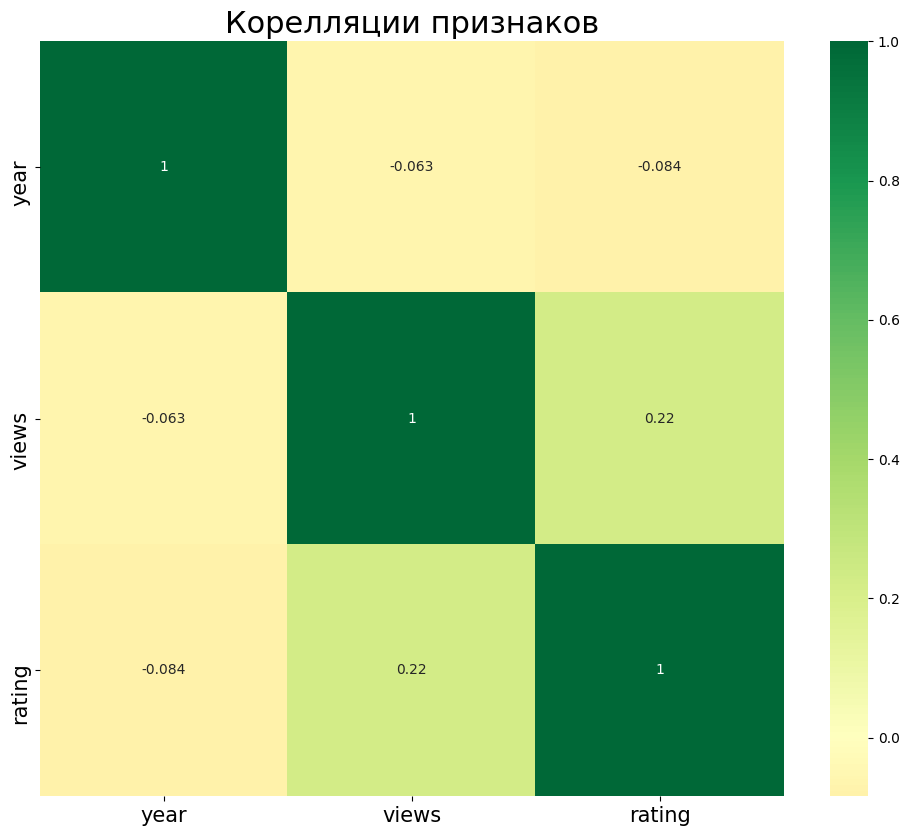

In [0]:
plt.figure(figsize=(12,10), dpi= 100)
sns.heatmap(my_dataset.corr(), xticklabels=my_dataset.corr().columns, yticklabels=my_dataset.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корелляции признаков', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

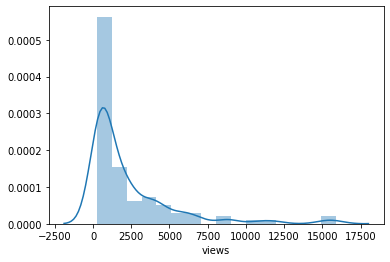

In [0]:
sns.distplot(my_dataset['views']);

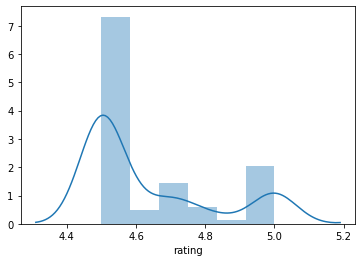

In [0]:
sns.distplot(my_dataset['rating']);

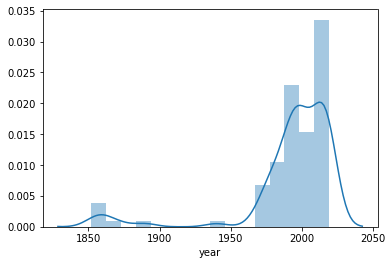

In [0]:
sns.distplot(my_dataset['year']);

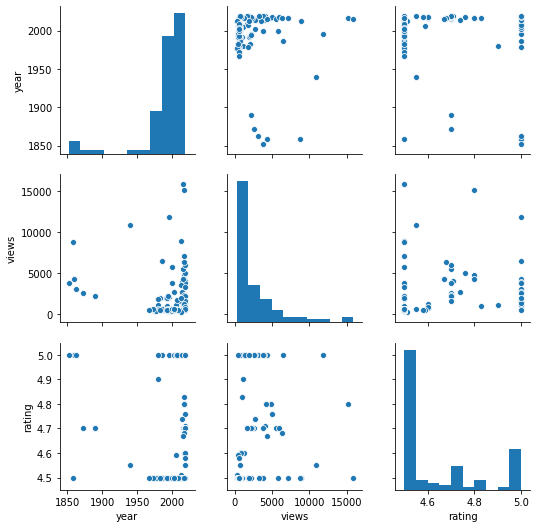

In [0]:
sns.pairplot(my_dataset);

In [0]:
import scipy.stats as sts
norm_rv = sts.norm(0, np.std(my_dataset['views']))

Text(0.5, 0, '$x$')

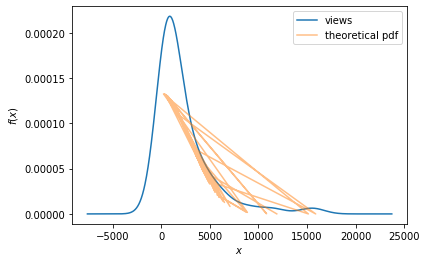

In [64]:
dx = my_dataset['views'].plot(kind='density')
# на том же графике построим теоретическую плотность распределения:
x = my_dataset['views']
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')